# Term paper code

## 1. Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import scipy.stats as stats

## 2. Load dataset and process.

In [2]:
# 读取数据
data = pd.read_excel("dataset.xlsx")

# 特征和目标
X = data.drop('VISIBILITY', axis=1)
y = data['VISIBILITY']

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 交叉验证设置
kf = KFold(n_splits=10, shuffle=True, random_state=42)

## 3. Use GBR model to train the dataset.

In [3]:
# 梯度提升回归
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
scores_gb = cross_val_score(gb_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
gb_reg.fit(X_train_scaled, y_train)
y_pred_gb = gb_reg.predict(X_test_scaled)
mse_gb_cv = -scores_gb.mean()

## 4. Eavluate the model.

In [4]:
# 评估模型
def evaluate_model(y_test, y_pred, mse_cv, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    print(f"{model_name:<25} - MSE: {mse:>10.2f}, CV MSE: {mse_cv:>10.2f}, R2: {r2:>5.2f}, MAE: {mae:>7.2f}, Explained Variance Score: {evs:>5.2f}")
    return mse, r2, mae, evs

mse_gb, r2_gb, mae_gb, evs_gb = evaluate_model(y_test, y_pred_gb, mse_gb_cv, "Gradient Boosting Regression")

Gradient Boosting Regression - MSE:    9752.16, CV MSE:    8695.91, R2:  0.24, MAE:   72.26, Explained Variance Score:  0.25


## 5. Plot result and evaluation.

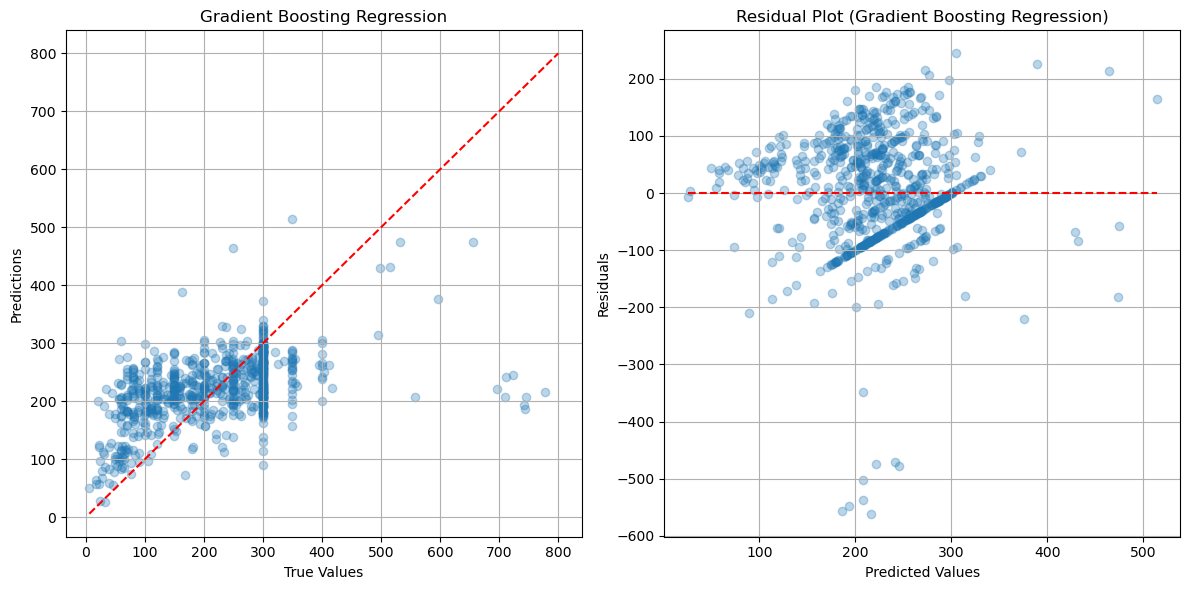

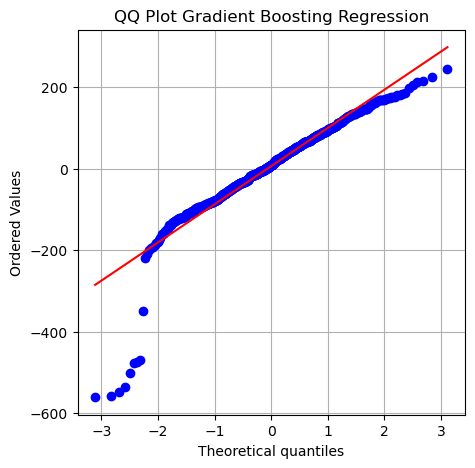

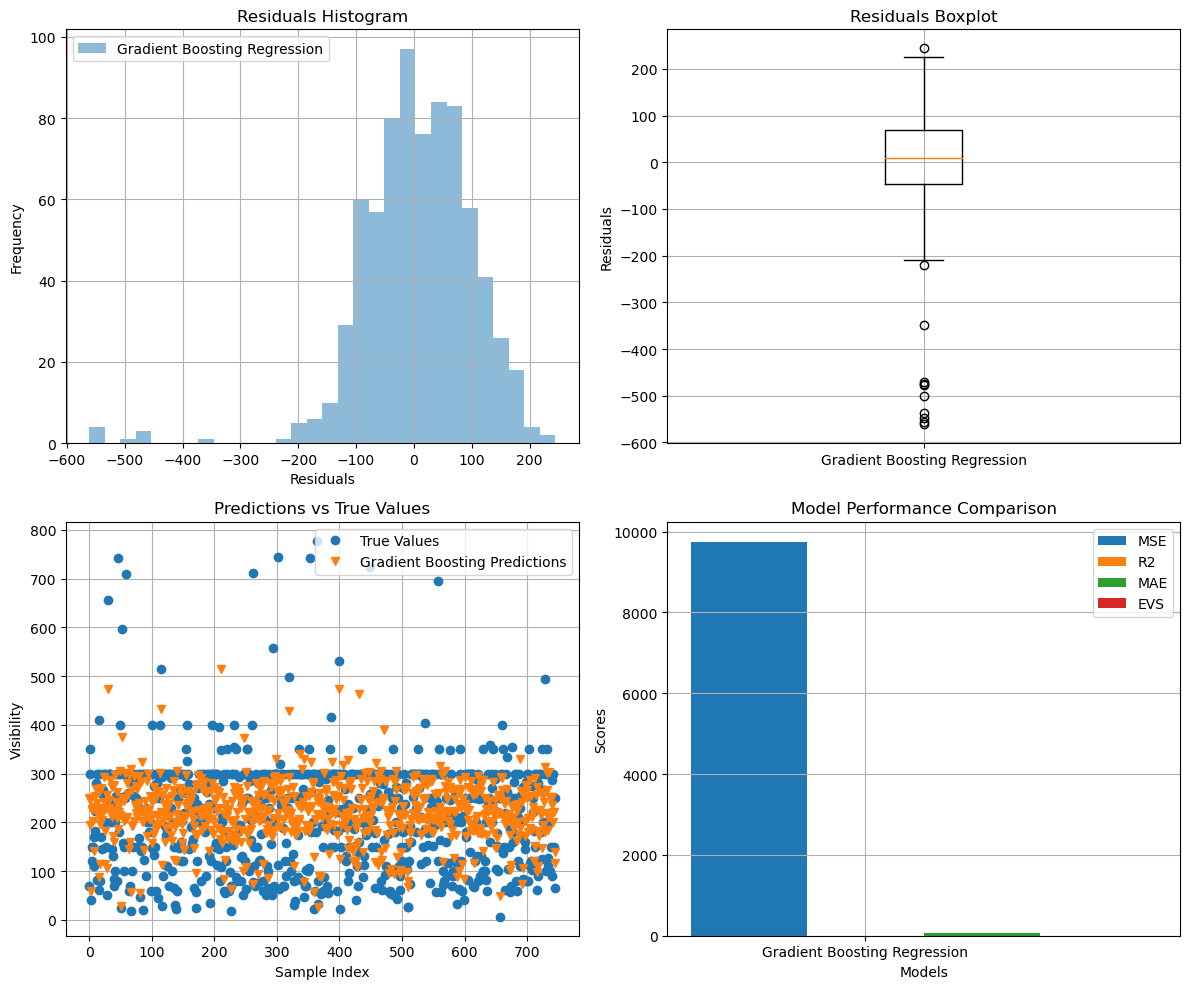

In [5]:
# 绘制结果图
plt.figure(figsize=(12, 6))

# 梯度提升回归结果图
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression')
plt.grid(True)

# 梯度提升残差图
plt.subplot(1, 2, 2)
residuals_gb = y_pred_gb - y_test
plt.scatter(y_pred_gb, residuals_gb, alpha=0.3)
plt.hlines(0, min(y_pred_gb), max(y_pred_gb), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting Regression)')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
stats.probplot(residuals_gb, dist="norm", plot=plt)
plt.title(f'QQ Plot Gradient Boosting Regression')
plt.grid(True)
plt.show()

# 绘制模型比较图
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(residuals_gb, bins=30, alpha=0.5, label='Gradient Boosting Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('Residuals Histogram')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.boxplot([residuals_gb], labels=['Gradient Boosting Regression'])
plt.ylabel('Residuals')
plt.title('Residuals Boxplot')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(len(y_test)), y_test, 'o', label='True Values')
plt.plot(range(len(y_test)), y_pred_gb, 'v', label='Gradient Boosting Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Visibility')
plt.legend()
plt.title('Predictions vs True Values')
plt.grid(True)

plt.subplot(2, 2, 4)
model_names = ['Gradient Boosting Regression']
mse_values = [mse_gb]
r2_values = [r2_gb]
mae_values = [mae_gb]
evs_values = [evs_gb]

bar_width = 0.2
index = np.arange(len(model_names))

plt.bar(index, mse_values, bar_width, label='MSE')
plt.bar(index + bar_width, r2_values, bar_width, label='R2')
plt.bar(index + 2 * bar_width, mae_values, bar_width, label='MAE')
plt.bar(index + 3 * bar_width, evs_values, bar_width, label='EVS')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Comparied with existing methods

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import scipy.stats as stats

# 线性回归
lin_reg = LinearRegression()
scores_lin = cross_val_score(lin_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
mse_lin_cv = -scores_lin.mean()

# 岭回归
ridge_reg = Ridge(alpha=1.0)
scores_ridge = cross_val_score(ridge_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
mse_ridge_cv = -scores_ridge.mean()

# 随机森林回归
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf_cv = -scores_rf.mean()


In [7]:
# 评估模型
def evaluate_model(y_test, y_pred, mse_cv, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    print(f"{model_name:<25} - MSE: {mse:>10.2f}, CV MSE: {mse_cv:>10.2f}, R2: {r2:>5.2f}, MAE: {mae:>7.2f}, Explained Variance Score: {evs:>5.2f}")
    return mse, r2, mae, evs

mse_lin, r2_lin, mae_lin, evs_lin = evaluate_model(y_test, y_pred_lin, mse_lin_cv, "Linear Regression")
mse_ridge, r2_ridge, mae_ridge, evs_ridge = evaluate_model(y_test, y_pred_ridge, mse_ridge_cv, "Ridge Regression")
mse_rf, r2_rf, mae_rf, evs_rf = evaluate_model(y_test, y_pred_rf, mse_rf_cv, "Random Forest Regression")

# 模型比较
print("\nModel Coefficients/Importances:")
print(f"{'Linear Regression Coefficients:':<30} {lin_reg.coef_}")
print(f"{'Ridge Regression Coefficients:':<30} {ridge_reg.coef_}")
print(f"{'Random Forest Feature Importances:':<30} {rf_reg.feature_importances_}")
print(f"{'Gradient Boosting Feature Importances:':<30} {gb_reg.feature_importances_}")


Linear Regression         - MSE:   11221.22, CV MSE:   10390.05, R2:  0.13, MAE:   79.32, Explained Variance Score:  0.13
Ridge Regression          - MSE:   11220.58, CV MSE:   10389.56, R2:  0.13, MAE:   79.32, Explained Variance Score:  0.13
Random Forest Regression  - MSE:    9790.59, CV MSE:    8806.87, R2:  0.24, MAE:   71.51, Explained Variance Score:  0.24

Model Coefficients/Importances:
Linear Regression Coefficients: [-27.2763181   -3.01859664  17.48955131  28.03616671  -8.02318713
 -22.14159347 -12.06399707   5.5674874 ]
Ridge Regression Coefficients: [-26.88181581  -3.4049898   17.49234022  27.96065613  -8.01335288
 -22.07436312 -12.06778527   5.55764101]
Random Forest Feature Importances: [0.26949877 0.10905295 0.11627532 0.10801343 0.08075647 0.08315993
 0.02141634 0.21182679]
Gradient Boosting Feature Importances: [0.40304115 0.12757326 0.09560035 0.05366513 0.03108274 0.05068806
 0.04228179 0.19606751]


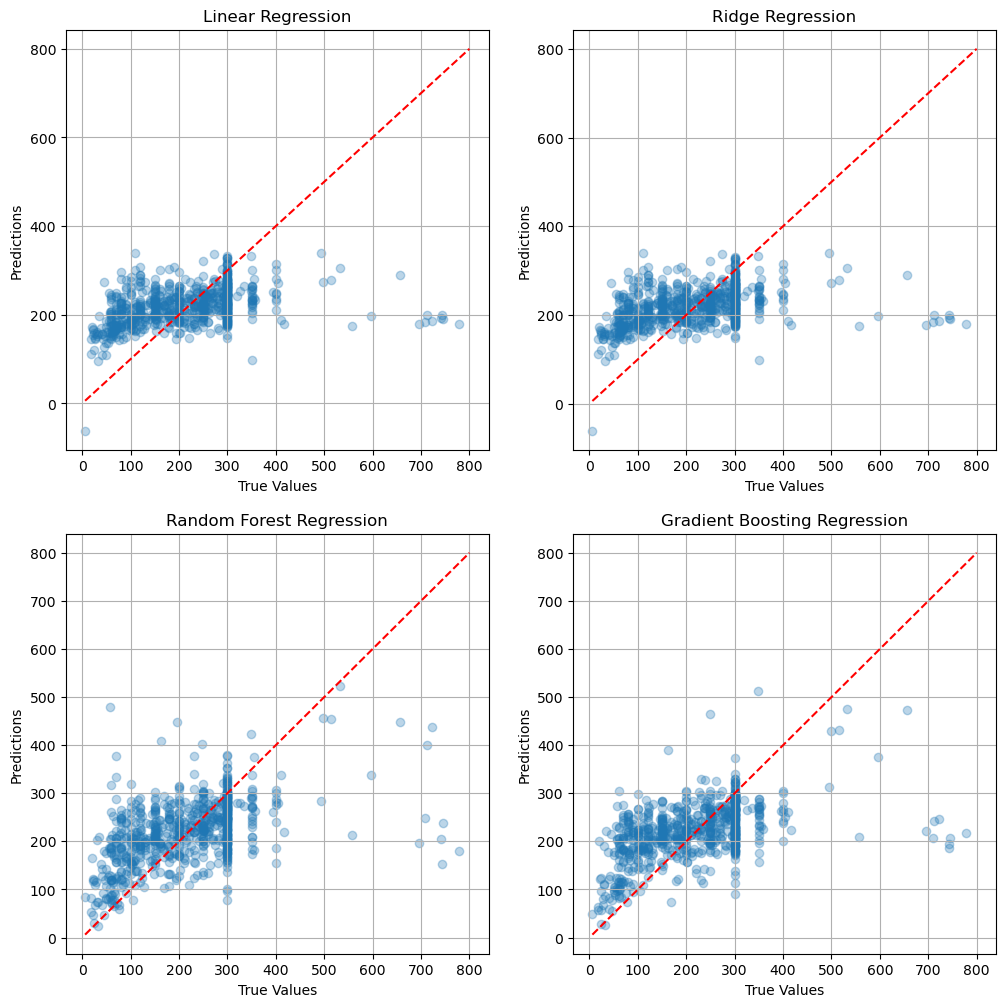

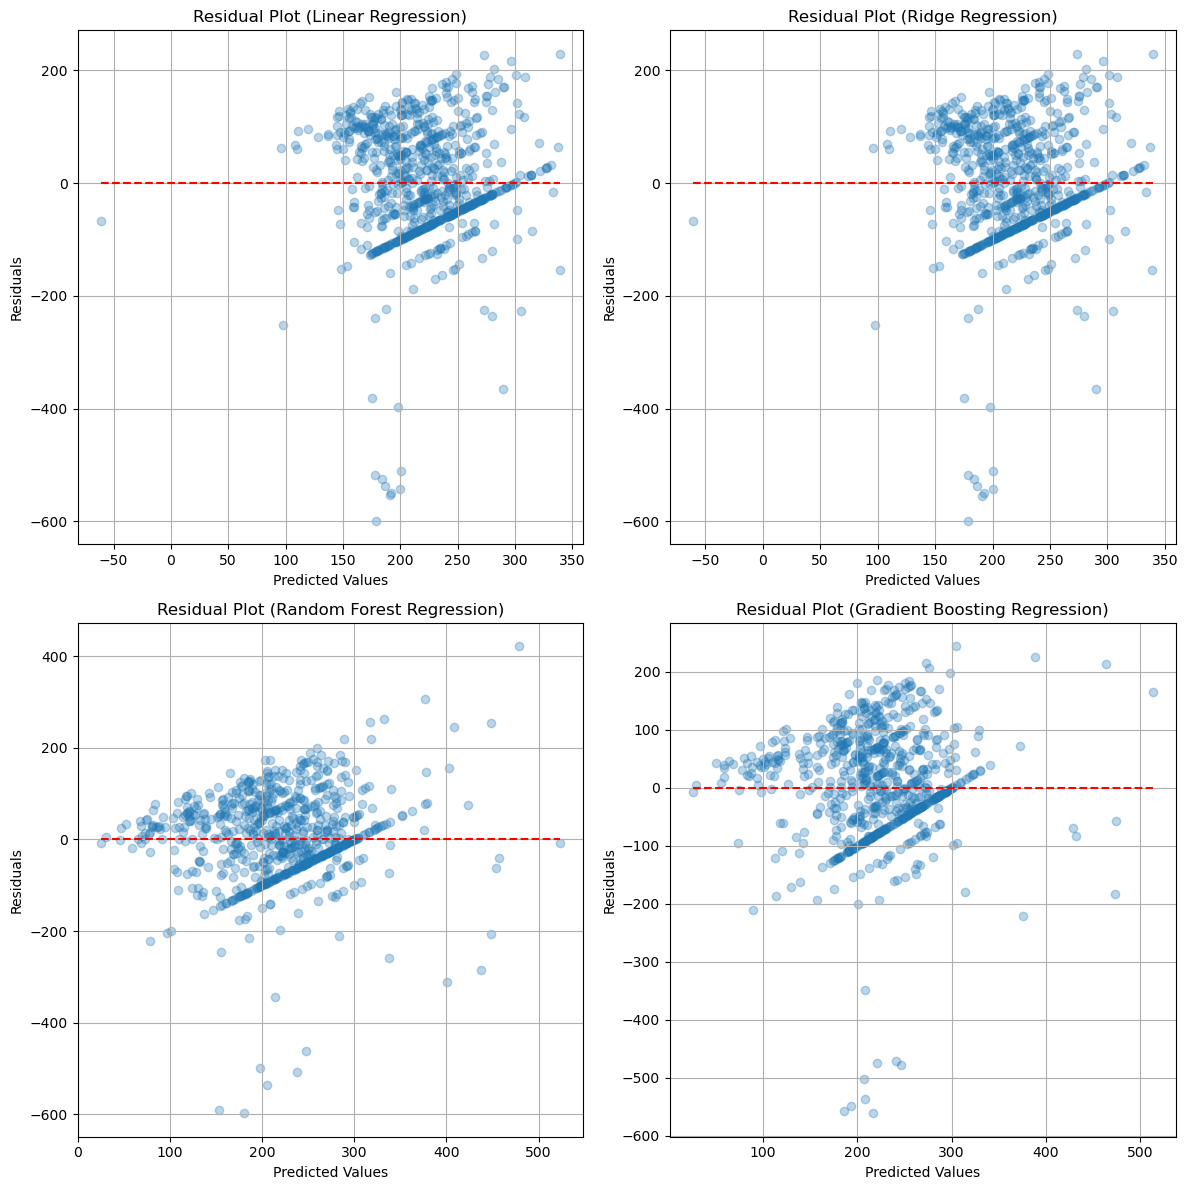

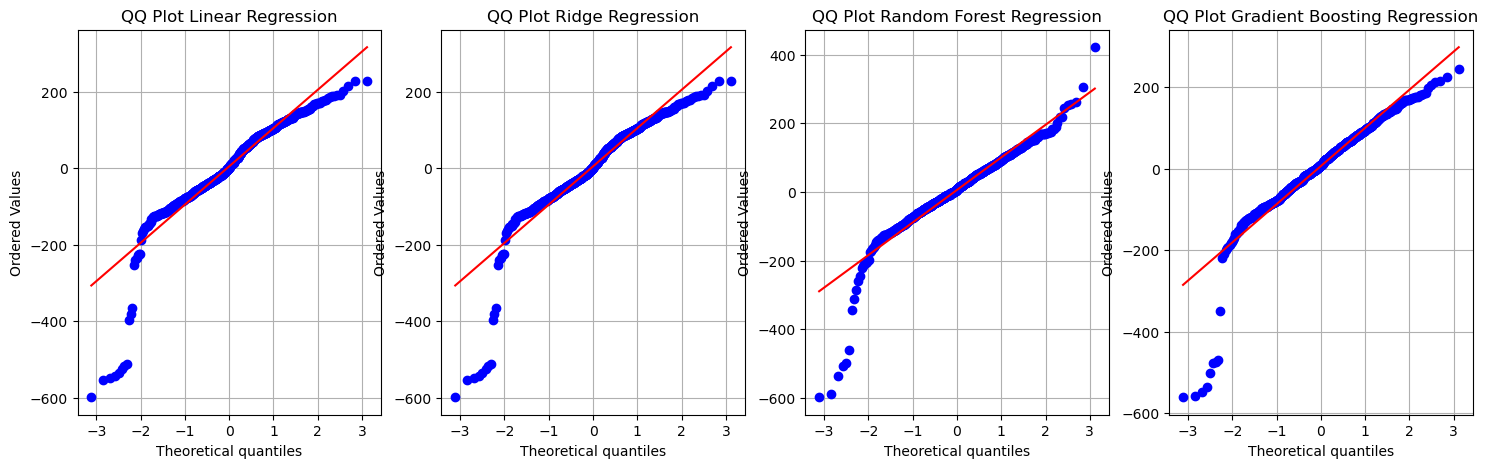

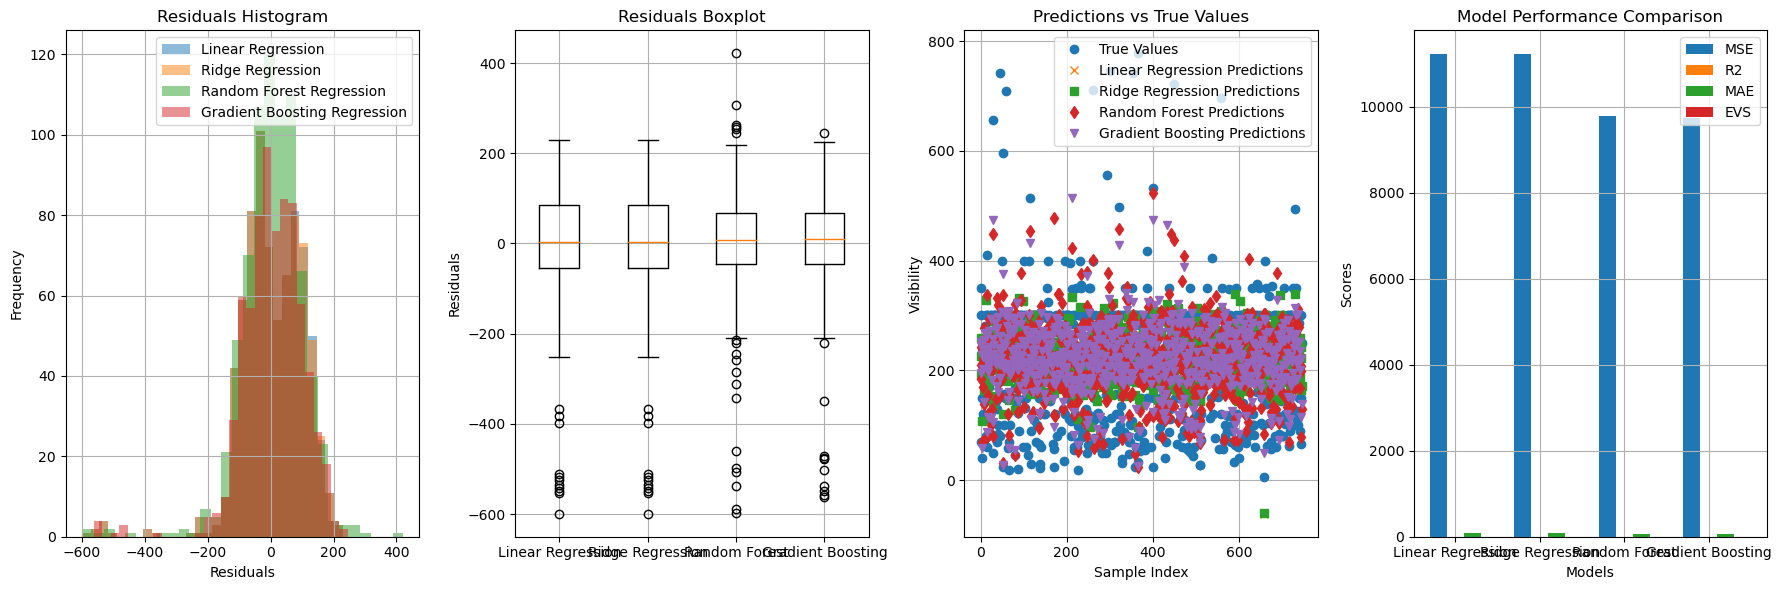

In [8]:
# 绘制回归结果图
plt.figure(figsize=(12, 12))
# 线性回归结果图
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.grid(True)

# 岭回归结果图
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression')
plt.grid(True)

# 随机森林回归结果图
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression')
plt.grid(True)

# 梯度提升回归结果图
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression')
plt.grid(True)

# 绘制残差图
plt.figure(figsize=(12, 12))
# 线性回归残差图
plt.subplot(2, 2, 1)
residuals_lin = y_pred_lin - y_test
plt.scatter(y_pred_lin, residuals_lin, alpha=0.3)
plt.hlines(0, min(y_pred_lin), max(y_pred_lin), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.grid(True)

# 岭回归残差图
plt.subplot(2, 2, 2)
residuals_ridge = y_pred_ridge - y_test
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.3)
plt.hlines(0, min(y_pred_ridge), max(y_pred_ridge), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.grid(True)

# 随机森林残差图
plt.subplot(2, 2, 3)
residuals_rf = y_pred_rf - y_test
plt.scatter(y_pred_rf, residuals_rf, alpha=0.3)
plt.hlines(0, min(y_pred_rf), max(y_pred_rf), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regression)')
plt.grid(True)

# 梯度提升残差图
plt.subplot(2, 2, 4)
residuals_gb = y_pred_gb - y_test
plt.scatter(y_pred_gb, residuals_gb, alpha=0.3)
plt.hlines(0, min(y_pred_gb), max(y_pred_gb), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 绘制QQ图
plt.figure(figsize=(18, 5))
plt.subplot(1, 4, 1)
stats.probplot(residuals_lin, dist="norm", plot=plt)
plt.title(f'QQ Plot Linear Regression')
plt.grid(True)

plt.subplot(1, 4, 2)
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title(f'QQ Plot Ridge Regression')
plt.grid(True)

plt.subplot(1, 4, 3)
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title(f'QQ Plot Random Forest Regression')
plt.grid(True)

plt.subplot(1, 4, 4)
stats.probplot(residuals_gb, dist="norm", plot=plt)
plt.title(f'QQ Plot Gradient Boosting Regression')
plt.grid(True)
plt.show()

# 绘制模型比较图
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.hist(residuals_lin, bins=30, alpha=0.5, label='Linear Regression')
plt.hist(residuals_ridge, bins=30, alpha=0.5, label='Ridge Regression')
plt.hist(residuals_rf, bins=30, alpha=0.5, label='Random Forest Regression')
plt.hist(residuals_gb, bins=30, alpha=0.5, label='Gradient Boosting Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('Residuals Histogram')
plt.grid(True)

plt.subplot(1, 4, 2)
plt.boxplot([residuals_lin, residuals_ridge, residuals_rf, residuals_gb], labels=['Linear Regression', 'Ridge Regression', 'Random Forest', 'Gradient Boosting'])
plt.ylabel('Residuals')
plt.title('Residuals Boxplot')
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(range(len(y_test)), y_test, 'o', label='True Values')
plt.plot(range(len(y_test)), y_pred_lin, 'x', label='Linear Regression Predictions')
plt.plot(range(len(y_test)), y_pred_ridge, 's', label='Ridge Regression Predictions')
plt.plot(range(len(y_test)), y_pred_rf, 'd', label='Random Forest Predictions')
plt.plot(range(len(y_test)), y_pred_gb, 'v', label='Gradient Boosting Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Visibility')
plt.legend()
plt.title('Predictions vs True Values')
plt.grid(True)

plt.subplot(1, 4, 4)
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_lin, mse_ridge, mse_rf, mse_gb]
r2_values = [r2_lin, r2_ridge, r2_rf, r2_gb]
mae_values = [mae_lin, mae_ridge, mae_rf, mae_gb]
evs_values = [evs_lin, evs_ridge, evs_rf, evs_gb]

bar_width = 0.2
index = np.arange(len(model_names))

plt.bar(index, mse_values, bar_width, label='MSE')
plt.bar(index + bar_width, r2_values, bar_width, label='R2')
plt.bar(index + 2 * bar_width, mae_values, bar_width, label='MAE')
plt.bar(index + 3 * bar_width, evs_values, bar_width, label='EVS')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()